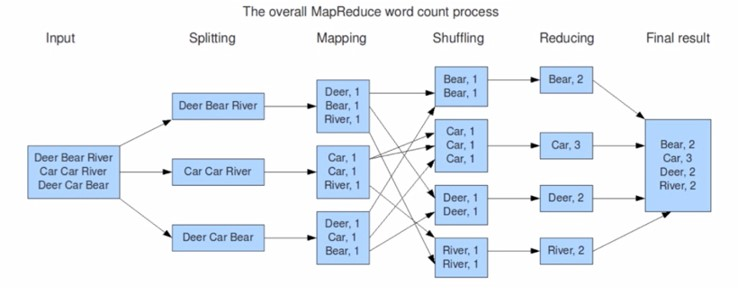

In [1]:
from IPython.display import Image
Image("C:/Users/qfu88/Desktop/Picture1.jpg")


## Word Count

In [2]:
!pip install mrjob

In [3]:
# Clean up previous versions of word_count.py and its output files
!rm -f -v word_count*

removed 'word_count.py'
removed 'word_count_output_short.tsv'


In [4]:
%%file word_count.py

from mrjob.job import MRJob
import re

class MRWordFrequencyCount(MRJob):

  ### input: self, in_key, in_value
  def mapper(self, _, line):
    yield "chars", len(line)
    yield "words", len(line.split())
    yield "lines", 1

  ### input: self, in_key from mapper, in_value from mapper
  def reducer(self, key, values):
    yield key, sum(values)
if __name__ == "__main__":
    MRWordFrequencyCount.run()

Writing word_count.py


Now let's look at the output of running the script with that file. Note that we are using the tee command here to make things easier for the autograder. The | character sends the output of our script to the tee command which prints it to the display, and also writes the script output to the given file name ("file_stats_output.tsv" in this case).

In [5]:
!python word_count.py Data/short.t1.txt | tee word_count_output_short.tsv

"chars"	10653
"lines"	200
"words"	1822


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory C:\Users\qfu88\AppData\Local\Temp\word_count.qfu88.20230729.230759.064594
Running step 1 of 1...
job output is in C:\Users\qfu88\AppData\Local\Temp\word_count.qfu88.20230729.230759.064594\output
Streaming final output from C:\Users\qfu88\AppData\Local\Temp\word_count.qfu88.20230729.230759.064594\output...
Removing temp directory C:\Users\qfu88\AppData\Local\Temp\word_count.qfu88.20230729.230759.064594...


## Most-used Word

In [6]:
# Clean up previous versions of most_used_word.py and its output files
!rm -f -v most_used_word*

removed 'most_used_word.py'
removed 'most_used_word_output_lewis.tsv'


In [7]:
%%file most_used_word.py
from mrjob.job import MRJob
from mrjob.step import MRStep
import re

from sys import stderr

# See the note above about debugging
def debug(*msg, **kwargs):
    """Print debugging message to standard error."""
    print(*msg, file=stderr, **kwargs)
    
    
def splitter(text):
    WORD_RE = re.compile(r"[\w']+")
    return WORD_RE.findall(text)


STOPWORDS = {
    'i', 'we', 'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during',
    'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such',
    'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each',
    'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me',
    'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up',
    'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been',
    'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so',
    'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself',
    'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by',
    'doing', 'it', 'how', 'further', 'was', 'here', 'than'
}


class MRMostUsedWord(MRJob):    
    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_words,
                   reducer=self.reducer_count_words),
            MRStep(reducer=self.reducer_find_max_word)
        ]

    def mapper_get_words(self, _, line):
        # YOUR CODE HERE
        words = splitter(line)
        for word in words:
            lowcase_word = word.lower()
            
            if lowcase_word not in STOPWORDS:
                yield lowcase_word, 1
        #raise NotImplementedError()
        
    def reducer_count_words(self, word, counts):
        # send all (num_occurrences, word) pairs to the same reducer.
        # num_occurrences is used so we can easily use Python's max() function.
        yield None, (sum(counts), word)

    # discard the key; it is just None
    def reducer_find_max_word(self, _, word_count_pairs):
        # each item of word_count_pairs is (count, word),
        # so yielding one results in key=counts, value=word
        yield max(word_count_pairs)



if __name__ == '__main__':
    import time
    start = time.time()
    MRMostUsedWord.run()
    end = time.time()
    debug("Run time:", end - start, "seconds")

Writing most_used_word.py


In [8]:
!python most_used_word.py Data/t3.lewis.txt | tee most_used_word_output_lewis.tsv

1334	"river"


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory C:\Users\qfu88\AppData\Local\Temp\most_used_word.qfu88.20230729.230800.509041
Running step 1 of 2...
Running step 2 of 2...
job output is in C:\Users\qfu88\AppData\Local\Temp\most_used_word.qfu88.20230729.230800.509041\output
Streaming final output from C:\Users\qfu88\AppData\Local\Temp\most_used_word.qfu88.20230729.230800.509041\output...
Removing temp directory C:\Users\qfu88\AppData\Local\Temp\most_used_word.qfu88.20230729.230800.509041...
Run time: 2.345078229904175 seconds


## Syllable Count

In [9]:
pip install syllables

Note: you may need to restart the kernel to use updated packages.


The syllables package has an estimate() method you can use to get an estimated count of syllables for a given word.

A couple of examples:

In [10]:
import syllables

syllables.estimate("funny")

2

In [11]:
syllables.estimate("strengths")

1

## Task: Write an MRJob script

Your task is to write a MRJob script that finds the 10 words that have the most syllables from the input file. This top-ten list should be sorted first by the syllable count, then by the word in alphabetic order. It should:


Use the splitter() function to split words
Only process words that are NOT in the STOPWORDS set
This should be case insensitive, meaning that, for example, "Dog" and "dog" should be processed together.
Use the sort_results() function (see below) to sort the final results.


Sorting the Results In order to simplify interpretation of the results, use the provided sort_results() function. For example: if our input is:

The dog sleeps by the fireplace.

and our mapper gives us a result like this:

[
    (1, "dog"),
    
   (3, "fireplace"),
    
   (1, "the"),
    
   (1, "sleeps"),
    
   (1, "by"),
]

The sort_results() function will sort that like this:

[
    (3, "fireplace"),
    
   (1, "by"),
    
   (1, "dog"),
    
   (1, "sleeps"),
    
   (1, "the"),
]

In [12]:
# Clean up previous versions of top_10_syllable_count.py and its output files
!rm -f -v top_10_syllable_count*

removed 'top_10_syllable_count.py'
removed 'top_10_syllable_count_output_short.tsv'


In [13]:
%%file top_10_syllable_count.py

from mrjob.job import MRJob
from mrjob.step import MRStep

import re
from sys import stderr

import syllables


# See the note above about debugging
def debug(*msg, **kwargs):
    """Print debugging message to standard error."""
    print(*msg, file=stderr, **kwargs)
    

def splitter(text):
    WORD_RE = re.compile(r"[\w']+")
    return WORD_RE.findall(text)


def sort_results(results):
    """
    Sorts a list of 2-tuples descending by the first value in the 
    tuple, ascending by the second value in the tuple.
    """
    return sorted(results, key=lambda k: (-k[0], k[1]))


STOPWORDS = {
    'i', 'we', 'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during',
    'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such',
    'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each',
    'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me',
    'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up',
    'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been',
    'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so',
    'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself',
    'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by',
    'doing', 'it', 'how', 'further', 'was', 'here', 'than'
}


# YOUR CODE HERE
class MRSyllableCounter(MRJob):

    def mapper(self, _, line):
        words = splitter(line)
        for word in words:
            word_lower = word.lower()
            if word_lower not in STOPWORDS:
                yield word_lower, syllables.estimate(word_lower)

    def combiner(self, word, counts):
        yield word, max(counts)

    def reducer(self, word, counts):
        yield None, (max(counts), word)

    def result_sorter(self, _, word_info):
        word_info = sort_results(list(word_info))
        top10 = word_info[:10]
        for word in top10:
            yield word

    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                   combiner=self.combiner,
                   reducer=self.reducer),
            MRStep(reducer=self.result_sorter)
        ]

if __name__ == '__main__':
    MRSyllableCounter.run()

Writing top_10_syllable_count.py


In [14]:
!python top_10_syllable_count.py Data/short.t1.txt | tee top_10_syllable_count_output_short.tsv

6	"phonotelephote"
6	"plenipotentiaries"
6	"revolutionized"
6	"unfortunately"
6	"unimaginable"
5	"accumulator"
5	"accumulators"
5	"agriculture"
5	"civilization"
5	"communicate"


No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory C:\Users\qfu88\AppData\Local\Temp\top_10_syllable_count.qfu88.20230729.230806.283640
Running step 1 of 2...
Running step 2 of 2...
job output is in C:\Users\qfu88\AppData\Local\Temp\top_10_syllable_count.qfu88.20230729.230806.283640\output
Streaming final output from C:\Users\qfu88\AppData\Local\Temp\top_10_syllable_count.qfu88.20230729.230806.283640\output...
Removing temp directory C:\Users\qfu88\AppData\Local\Temp\top_10_syllable_count.qfu88.20230729.230806.283640...
